In [58]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [59]:
#Load data
X_train = pd.read_csv('../data/X_train_wodum.csv')
X_test = pd.read_csv('../data/X_test_wodum.csv')

y_train = pd.read_csv('../data/y_train_wodum.csv')
y_test = pd.read_csv('../data/y_test_wodum.csv')

In [60]:
X_train.head()
y_train.describe()

,target
count,74943.000000
mean,55.520075
std,123.079615
min,0.000000
25%,0.000000
50%,19.000000
75%,50.000000
max,3451.000000


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74943 entries, 0 to 74942
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   s_std_time_dec   74943 non-null  float64
 8   c_std_time_dec   74943 non-null  float64
 9   iso_country_dep  74943 non-null  object 
 10  type_dep         74943 non-null  object 
 11  iso_country_arr  74943 non-null  object 
 12  type_arr         74943 non-null  object 
 13  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 7.5+ MB


In [62]:
# # Perform one-hot encoding on categorical features
# X_train_encoded = pd.get_dummies(X_train, columns=['ac','std_day', 'sta_day', 'std_month', 'sta_month', 'iso_country_dep', 'type_dep', 'iso_country_arr', 'type_arr'])
# X_test_encoded = pd.get_dummies(X_test, columns=['ac', 'std_day', 'sta_day', 'std_month', 'sta_month', 'iso_country_dep', 'type_dep', 'iso_country_arr', 'type_arr'])

# # Ensure the same columns in both train and test sets
# X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# print(X_train_encoded.head())
# print(X_test_encoded.head())

In [63]:
import category_encoders as ce

# Define the columns to be target encoded
categorical_columns = categorical_features = ['ac', 'std_day', 'sta_day', 'std_month', 'sta_month', 'iso_country_dep', 'iso_country_arr', 'type_dep', 'type_arr']

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=categorical_columns, smoothing= 0.3)

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

print(X_train_encoded.head())
print(X_test_encoded.head())

          ac  s_std_day_year  c_std_day_year    std_day    sta_day  std_month   
0  56.099755        0.746972        0.664855  62.465206  62.465206  25.940156  \
1  36.295294        0.835925       -0.548843  62.770733  62.770733  61.538888   
2  60.354380        0.471160       -0.882048  57.559939  57.559939  49.145483   
3  40.940767        0.463550        0.886071  57.559939  57.559939  43.401801   
4  36.295294       -0.845249       -0.534373  45.435388  45.435388  72.373762   

   sta_month  s_std_time_dec  c_std_time_dec  iso_country_dep   type_dep   
0  25.940156        0.156434       -0.987688        42.083333  57.708866  \
1  61.538888       -0.998630        0.052336        60.060804  47.111125   
2  49.145483       -0.453990       -0.891007        60.060804  57.708866   
3  43.401801        0.649448       -0.760406        50.982419  57.708866   
4  72.373762        0.500000       -0.866025        30.712766  57.708866   

   iso_country_arr   type_arr  is_same_country  
0      

In [64]:
# # Create a boxplot of y_train
# plt.figure(figsize=(10, 6))
# sns.boxplot(y=y_train['target'])
# plt.title('Boxplot of y_train')
# plt.ylabel('Target')
# # plt.show()

In [65]:
# Log transform y_train
#y_train_log = np.log1p(y_train)

# Print the transformed y_train


In [66]:
# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
#model = xgb.XGBRegressor(objective='reg:pseudohubererror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
model.fit(X_train_encoded, y_train)

# Print the model
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

#re-transform the target variable
#y_pred = np.expm1(y_pred_log)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 14036.7490234375
Mean Absolute Error (MAE): 55.839237213134766
R-squared (R²): 0.08698397874832153


In [103]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:pseudohubererror'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_encoded, y_train_log)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Update the model with the best parameters
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train_encoded, y_train_log)

# Print the best model
print(best_model)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}
Best score: -2.6377443344059244
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, objective='reg:pseudohubererror', ...)


In [107]:
import optuna 

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'objective': 'reg:pseudohubererror'
    }
    
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_encoded, y_train_log)
    y_pred_log = model.predict(X_test_encoded)
    y_pred = np.expm1(y_pred_log)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(f'Best trial: {study.best_trial.params}')

[I 2025-03-10 11:34:09,091] A new study created in memory with name: no-name-f503f7f1-63c7-4c5e-87cc-710af7add2d7
[I 2025-03-10 11:34:11,387] Trial 0 finished with value: 15540.42368584934 and parameters: {'n_estimators': 364, 'learning_rate': 0.22156673685035785, 'max_depth': 5, 'subsample': 0.9051267480809656, 'colsample_bytree': 0.7384568810692604}. Best is trial 0 with value: 15540.42368584934.
[I 2025-03-10 11:34:12,569] Trial 1 finished with value: 15980.293196953524 and parameters: {'n_estimators': 110, 'learning_rate': 0.05052299458371547, 'max_depth': 7, 'subsample': 0.9129113466160386, 'colsample_bytree': 0.9048232822581053}. Best is trial 0 with value: 15540.42368584934.
[I 2025-03-10 11:34:13,337] Trial 2 finished with value: 16057.115090082565 and parameters: {'n_estimators': 110, 'learning_rate': 0.06829459502647124, 'max_depth': 5, 'subsample': 0.6803422463643098, 'colsample_bytree': 0.8803323409694999}. Best is trial 0 with value: 15540.42368584934.
[I 2025-03-10 11:34:

Best trial: {'n_estimators': 265, 'learning_rate': 0.3306986554051836, 'max_depth': 7, 'subsample': 0.7334351108170162, 'colsample_bytree': 0.5809796848178893}


In [ ]:
#

In [109]:
# Make predictions on the test set using the best model
y_pred_log_best = best_random_model.predict(X_test_encoded)

# Re-transform the target variable
y_pred_best = np.expm1(y_pred_log_best)

# Calculate Mean Squared Error (MSE)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error (MSE) for the best model: {mse_best}')

# Calculate Mean Absolute Error (MAE)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Absolute Error (MAE) for the best model: {mae_best}')

# Calculate R-squared (R²)
r2_best = r2_score(y_test, y_pred_best)
print(f'R-squared (R²) for the best model: {r2_best}')

Mean Squared Error (MSE) for the best model: 15665.240992299889
Mean Absolute Error (MAE) for the best model: 46.173064534512534
R-squared (R²) for the best model: -0.018940724614983084


In [74]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the top 50 most important features
top_50_features = feature_importances.head(50)

print(top_50_features)

                     Feature  Importance
151  type_dep_medium_airport    0.173271
1            is_same_country    0.069754
147       iso_country_dep_TN    0.045841
150   type_dep_large_airport    0.033376
199       iso_country_arr_TN    0.027398
48              ac_TU 332IFM    0.020589
129       iso_country_dep_MA    0.017207
109       iso_country_dep_CZ    0.015393
0               std_time_dec    0.015229
202   type_arr_large_airport    0.014782
133       iso_country_dep_NE    0.013594
49              ac_TU 332IFN    0.013554
31              ac_TU 31BIMQ    0.012859
77          std_month_August    0.012775
79        std_month_February    0.012269
144       iso_country_dep_SI    0.011901
16              ac_D4 319CQG    0.011759
141       iso_country_dep_SA    0.011745
124       iso_country_dep_IT    0.011597
103       iso_country_dep_BF    0.011301
145       iso_country_dep_SK    0.010943
116       iso_country_dep_FR    0.010802
85        std_month_November    0.010263
155       iso_co

In [76]:

# Select the top 50 most important features
top_50_feature_names = top_50_features['Feature'].tolist()
X_train_top_50 = X_train_encoded[top_50_feature_names]
X_test_top_50 = X_test_encoded[top_50_feature_names]

# Create and train the model with the top 50 features
model_top_50 = xgb.XGBRegressor(objective='reg:pseudohubererror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_top_50.fit(X_train_top_50, y_train_log)

# Make predictions on the test set using the model trained with the top 50 features
y_pred_log_top_50 = model_top_50.predict(X_test_top_50)
y_pred_top_50 = np.expm1(y_pred_log_top_50)

# Calculate Mean Squared Error (MSE)
mse_top_50 = mean_squared_error(y_test, y_pred_top_50)
print(f'Mean Squared Error (MSE) with top 50 features: {mse_top_50}')

# Calculate Mean Absolute Error (MAE)
mae_top_50 = mean_absolute_error(y_test, y_pred_top_50)
print(f'Mean Absolute Error (MAE) with top 50 features: {mae_top_50}')

# Calculate R-squared (R²)
r2_top_50 = r2_score(y_test, y_pred_top_50)
print(f'R-squared (R²) with top 50 features: {r2_top_50}')


Mean Squared Error (MSE) with top 50 features: 16005.392983928425
Mean Absolute Error (MAE) with top 50 features: 47.16715503193797
R-squared (R²) with top 50 features: -0.04106580503982782


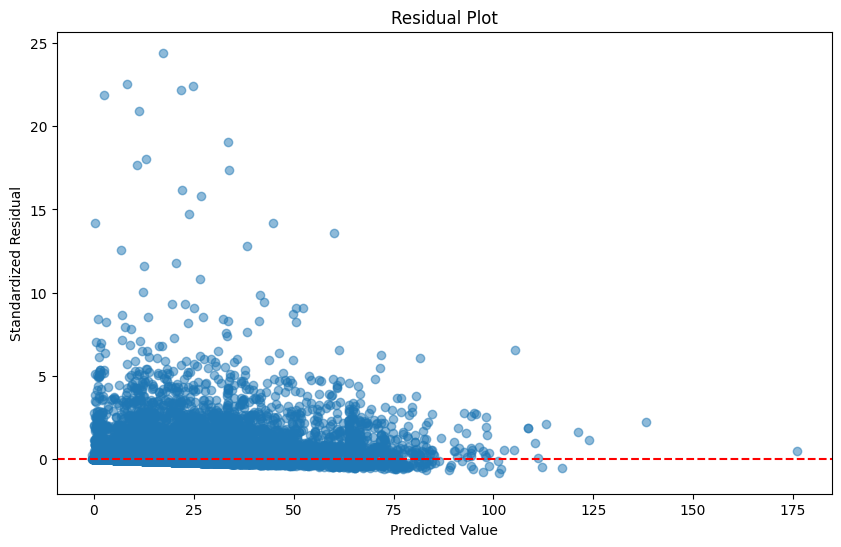

In [122]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred

# Standardize residuals
standardized_residuals = residuals / np.std(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, standardized_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot')
plt.show()

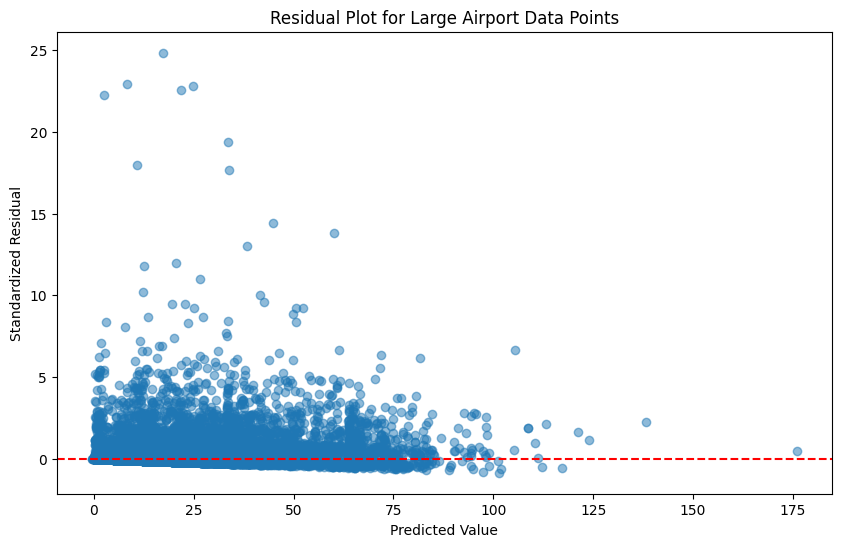

0.29802164966460754

In [154]:
# Filter the data points where "type_arr_large_airport" is TRUE
large_airport_indices = X_test_encoded[X_test_encoded['type_arr_large_airport'] == True].index
residuals_large_airport = residuals[large_airport_indices]
y_pred_large_airport = y_pred[large_airport_indices]

# Standardize residuals for large airport data points
standardized_residuals_large_airport = residuals_large_airport / np.std(residuals_large_airport)

# Create a residual plot for large airport data points
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_large_airport, standardized_residuals_large_airport, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot for Large Airport Data Points')
plt.show()

np.mean(standardized_residuals_large_airport)
#np.mean(standardized_residuals)

In [147]:
y_pred_large_airport.shape


(14795,)

In [135]:
# Find the indices of standardized residuals above 10
high_residuals_indices = np.where(standardized_residuals > 10)[0]

# Get the corresponding data points from X_test_top_50
high_residuals_data = X_test_encoded.iloc[high_residuals_indices]

# Display the data points
print(high_residuals_data)

       std_time_dec  is_same_country  ac_5K 343TQY  ac_5K 345TFX   
1121           12.8            False         False         False  \
1161           22.7            False         False         False   
4281           14.4            False         False         False   
5767           20.0             True         False         False   
5925           17.3            False         False         False   
6534            2.2            False         False         False   
9023           18.0            False         False         False   
10296          18.2            False         False         False   
10521          19.4            False         False         False   
10846          11.9            False         False         False   
11658          22.7            False         False         False   
11928          11.5            False         False         False   
12275          20.8            False         False         False   
13474          16.1            False         Fal

        std_time_dec is_same_country ac_5K 343TQY ac_5K 345TFX ac_5M 343FOX   
count       22.00000              22           22           22           22  \
unique           NaN               2            1            1            1   
top              NaN           False        False        False        False   
freq             NaN              19           22           22           22   
mean        16.45000             NaN          NaN          NaN          NaN   
std          5.01728             NaN          NaN          NaN          NaN   
min          2.20000             NaN          NaN          NaN          NaN   
25%         13.12500             NaN          NaN          NaN          NaN   
50%         17.65000             NaN          NaN          NaN          NaN   
75%         19.90000             NaN          NaN          NaN          NaN   
max         22.70000             NaN          NaN          NaN          NaN   

       ac_5M 343JAI ac_5M 343SUN ac_6P M87TRJ ac_BJ

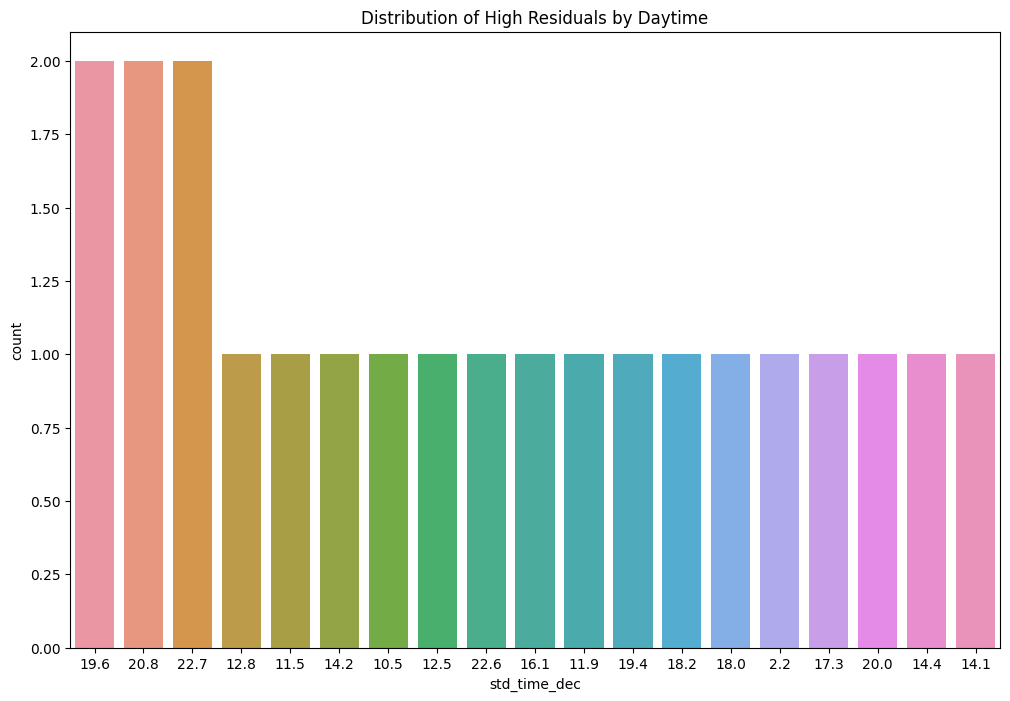

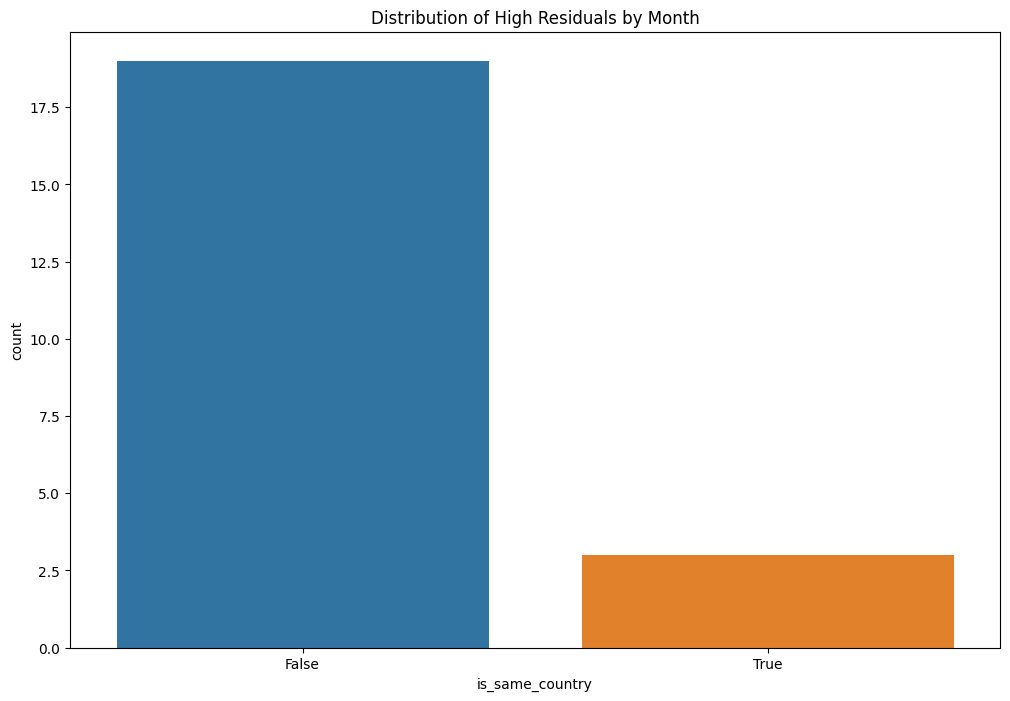

KeyError: 'iso_country_dep'

<Figure size 1200x800 with 0 Axes>

In [142]:
# Analyze the high residuals data
high_residuals_summary = high_residuals_data.describe(include='all')
print(high_residuals_summary)

# Visualize the distribution of high residuals for some key features
plt.figure(figsize=(12, 8))
sns.countplot(data=high_residuals_data, x='std_time_dec', order=high_residuals_data['std_time_dec'].value_counts().index)
plt.title('Distribution of High Residuals by Daytime')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=high_residuals_data, x='is_same_country', order=high_residuals_data['is_same_country'].value_counts().index)
plt.title('Distribution of High Residuals by Month')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=high_residuals_data, x='iso_country_dep', order=high_residuals_data['iso_country_dep'].value_counts().index)
plt.title('Distribution of High Residuals by Departure Country')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=high_residuals_data, x='iso_country_arr', order=high_residuals_data['iso_country_arr'].value_counts().index)
plt.title('Distribution of High Residuals by Arrival Country')
plt.show()

In [145]:
nan_rows = X_train_encoded[X_train_encoded['type_arr_small_airport'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [std_time_dec, is_same_country, ac_5K 343TQY, ac_5K 345TFX, ac_5M 343FOX, ac_5M 343JAI, ac_5M 343SUN, ac_6P M87TRJ, ac_BJ 320INA, ac_BJ 320INB, ac_BJ 320INC, ac_BJ 320INH, ac_BJ 320INO, ac_BJ 320INP, ac_BJ 320INQ, ac_BJ 320INR, ac_D4 319CQG, ac_D4 320CQP, ac_GJ 733EWE, ac_GJ 733GGC, ac_GJ 733LGC, ac_GJ 734CGC, ac_GJ 734MGC, ac_GJ 734PGC, ac_GW 320MQH, ac_OL 321ABY, ac_PS 738PSD, ac_QS 738TSC, ac_TU 31AIMJ, ac_TU 31AIMK, ac_TU 31BIMO, ac_TU 31BIMQ, ac_TU 320IMR, ac_TU 320IMS, ac_TU 320IMT, ac_TU 320IMU, ac_TU 320IMV, ac_TU 320IMW, ac_TU 32AIMC, ac_TU 32AIMD, ac_TU 32AIMF, ac_TU 32AIMG, ac_TU 32AIMH, ac_TU 32AIMI, ac_TU 32AIML, ac_TU 32AIMM, ac_TU 32AIMN, ac_TU 32AIMP, ac_TU 332IFM, ac_TU 332IFN, ac_TU 736IOK, ac_TU 736IOL, ac_TU 736IOM, ac_TU 736ION, ac_TU 736IOP, ac_TU 736IOQ, ac_TU 736IOR, ac_TU CR9ISA, ac_UG AT7LBD, ac_UG AT7LBE, ac_UJ 320TCF, ac_X9 320VEB, std_day_Friday, std_day_Monday, std_day_Saturday, std_day_Sunday, std_day_Thursday, std_day_Tuesday, st

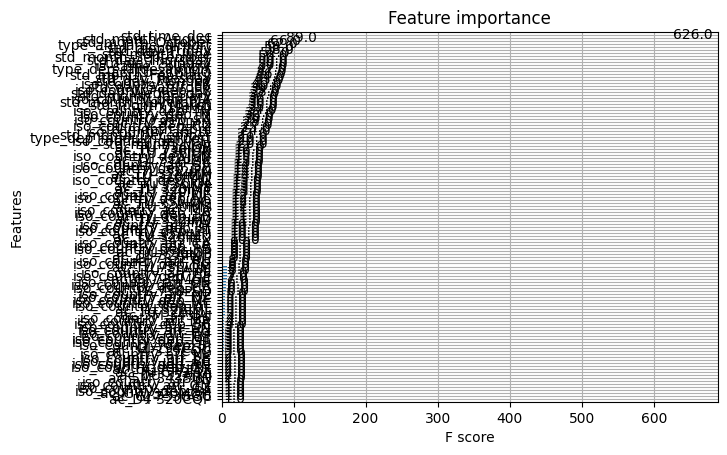

In [137]:
xgb.plot_importance(model, max_num_features=200)
plt.show()

In [139]:
# Get the feature importance scores
f_score = model.get_booster().get_score(importance_type='weight')

# Convert the scores to a DataFrame for better visualization
f_score_df = pd.DataFrame(f_score.items(), columns=['Feature', 'F Score']).sort_values(by='F Score', ascending=False)

print(f_score_df)

                    Feature  F Score
0              std_time_dec    626.0
52         std_month_August     89.0
61        std_month_October     66.0
121  type_arr_large_airport     62.0
44           std_day_Friday     58.0
..                      ...      ...
114      iso_country_arr_PT      1.0
100      iso_country_arr_CZ      1.0
65       iso_country_dep_BF      1.0
12             ac_GW 320MQH      1.0
6              ac_D4 320CQP      1.0

[122 rows x 2 columns]


In [138]:
# Get the top 10 most important features
top_10_features = feature_importances.head(10)

print(top_10_features)

                     Feature  Importance
151  type_dep_medium_airport    0.173271
1            is_same_country    0.069754
147       iso_country_dep_TN    0.045841
150   type_dep_large_airport    0.033376
199       iso_country_arr_TN    0.027398
48              ac_TU 332IFM    0.020589
129       iso_country_dep_MA    0.017207
109       iso_country_dep_CZ    0.015393
0               std_time_dec    0.015229
202   type_arr_large_airport    0.014782


In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:pseudohubererror'),
                                   param_distributions=param_dist,
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   n_iter=50,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the random search to the data
random_search.fit(X_train_encoded, y_train_log)

# Print the best parameters and the best score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

# Update the model with the best parameters
best_random_model = random_search.best_estimator_

# Train the best model
best_random_model.fit(X_train_encoded, y_train_log)

# Print the best model
print(best_random_model)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best score: -2.666320206987001
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, objective='reg:pseudohubererror', ...)


In [ ]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred

# Standardize residuals
standardized_residuals = residuals / np.std(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, standardized_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot')
plt.show()

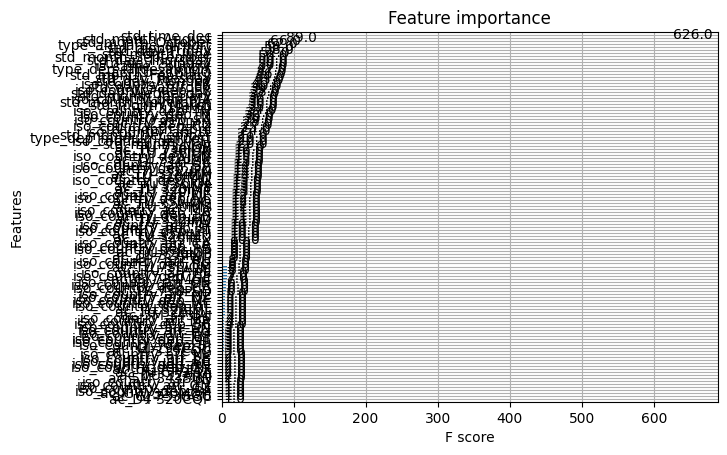

In [60]:
xgb.plot_importance(model)
plt.show()